In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import pi
import plotly.express as px
import plotly.graph_objs as go

%matplotlib inline

## Data Preprocessing

In [83]:
df = pd.read_csv("players_20.csv")
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [84]:
##The data has 18278 rows & 104 columns

df.shape

(18278, 104)

In [85]:
# Checking for Duplicates

print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    18278
dtype: int64
18278


In [86]:
# Finding missing values

df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [87]:
#Getting the statistics of the dataset

statistics= df.describe().round(3).T
statistics

,count,mean,std,min,25%,50%,75%,max
sofifa_id,18278.0,219738.864,27960.200,768.0,204445.5,226165.0,240795.75,252905.0
age,18278.0,25.283,4.657,16.0,22.0,25.0,29.00,42.0
height_cm,18278.0,181.362,6.757,156.0,177.0,181.0,186.00,205.0
weight_kg,18278.0,75.276,7.048,50.0,70.0,75.0,80.00,110.0
overall,18278.0,66.245,6.950,48.0,62.0,66.0,71.00,94.0
...,...,...,...,...,...,...,...,...
goalkeeping_diving,18278.0,16.573,17.738,1.0,8.0,11.0,14.00,90.0
goalkeeping_handling,18278.0,16.355,16.997,1.0,8.0,11.0,14.00,92.0
goalkeeping_kicking,18278.0,16.213,16.614,1.0,8.0,11.0,14.00,93.0
goalkeeping_positioning,18278.0,16.368,17.136,1.0,8.0,11.0,14.00,91.0


In [88]:
#getting a proportion of missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data.reset_index(drop = False)
missing_data = missing_data.rename(columns={"index": "Columns", 0:"Value"})
missing_data['proportion'] = ((missing_data['Value'] / len(df)) * 100).round().astype(int)
missing_data.head()

,Columns,Value,proportion
0,loaned_from,17230,94
1,nation_position,17152,94
2,nation_jersey_number,17152,94
3,player_tags,16779,92
4,gk_speed,16242,89


In [89]:
# Assuming 'missing_data' DataFrame is already defined and contains columns 'Columns', 'Value', and 'proportion'

# Sort missing_data by proportion of missing values
missing_data_sorted = missing_data.sort_values(by='proportion', ascending=False)

# Create a table trace
table_trace = go.Table(
    header=dict(values=["Columns", "Missing Count", "Proportion"],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[missing_data_sorted['Columns'], missing_data_sorted['Value'], missing_data_sorted['proportion']],
               fill_color='lavender',
               align='left')
)

# Create a figure and add the table trace
fig_table = go.Figure(data=table_trace)
fig_table.update_layout(
    title='Missing Values in Columns',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family='Cambria, monospace', size=12, color='#000000')
)

# Save the table as an HTML file
pio.write_html(fig_table, file="missing_data_table.html", auto_open=True)

# Show the table
fig_table.show()


In [90]:
#Handling missing values


df['release_clause_eur'].fillna(0,inplace=True)
df['player_tags'].fillna('#Team Player',inplace=True)
df['team_position'].fillna('Not Decided',inplace=True)                                  
df['team_jersey_number'].fillna(0,inplace=True)
df['loaned_from'].fillna('Disclosed',inplace=True)
df['joined'].fillna('Disclosed',inplace=True)
df['contract_valid_until'].fillna('Disclosed',inplace=True)
df['pace'].fillna(df['pace'].mean(),inplace=True)
df['shooting'].fillna(df['shooting'].mean(),inplace=True)
df['passing'].fillna(df['passing'].mean(),inplace=True)
df['dribbling'].fillna(df['dribbling'].mean(),inplace=True)
df['defending'].fillna(df['defending'].mean(),inplace=True)
df['physic'].fillna(df['physic'].mean(),inplace=True)
df['gk_diving'].fillna(df['gk_diving'].mean(),inplace=True)
df['gk_handling'].fillna(df['gk_handling'].mean(),inplace=True)
df['gk_kicking'].fillna(df['gk_kicking'].mean(),inplace=True)
df['gk_reflexes'].fillna(df['gk_reflexes'].mean(),inplace=True)
df['gk_speed'].fillna(df['gk_speed'].mean(),inplace=True)
df['gk_positioning'].fillna(df['gk_positioning'].mean(),inplace=True)
df['player_traits'].fillna('NA',inplace=True)
df['ls'].fillna('NA',inplace=True)
df['st'].fillna('NA',inplace=True)
df['rs'].fillna('NA',inplace=True)
df['lw'].fillna('NA',inplace=True)
df['lf'].fillna('NA',inplace=True)
df['cf'].fillna('NA',inplace=True)
df['rf'].fillna('NA',inplace=True)
df['rw'].fillna('NA',inplace=True)
df['lam'].fillna('NA',inplace=True)
df['cam'].fillna('NA',inplace=True)
df['ram'].fillna('NA',inplace=True)
df['lm'].fillna('NA',inplace=True)
df['lcm'].fillna('NA',inplace=True)
df['cm'].fillna('NA',inplace=True)
df['rcm'].fillna('NA',inplace=True)
df['rm'].fillna('NA',inplace=True)
df['lwb'].fillna('NA',inplace=True)
df['ldm'].fillna('NA',inplace=True)
df['cdm'].fillna('NA',inplace=True)
df['rdm'].fillna('NA',inplace=True)
df['rwb'].fillna('NA',inplace=True)
df['lb'].fillna('NA',inplace=True)
df['lcb'].fillna('NA',inplace=True)
df['cb'].fillna('NA',inplace=True)
df['rcb'].fillna('NA',inplace=True)
df['rb'].fillna('NA',inplace=True)

In [91]:
df.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 104, dtype: int64

In [92]:
#Dropping the unnecessary columns

df.drop(['sofifa_id','player_url','real_face','nation_position','nation_jersey_number','long_name'], axis=1, inplace=True)
df.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


<Axes: title={'center': 'Age Distribution in FIFA 20'}, xlabel='age', ylabel='Count'>

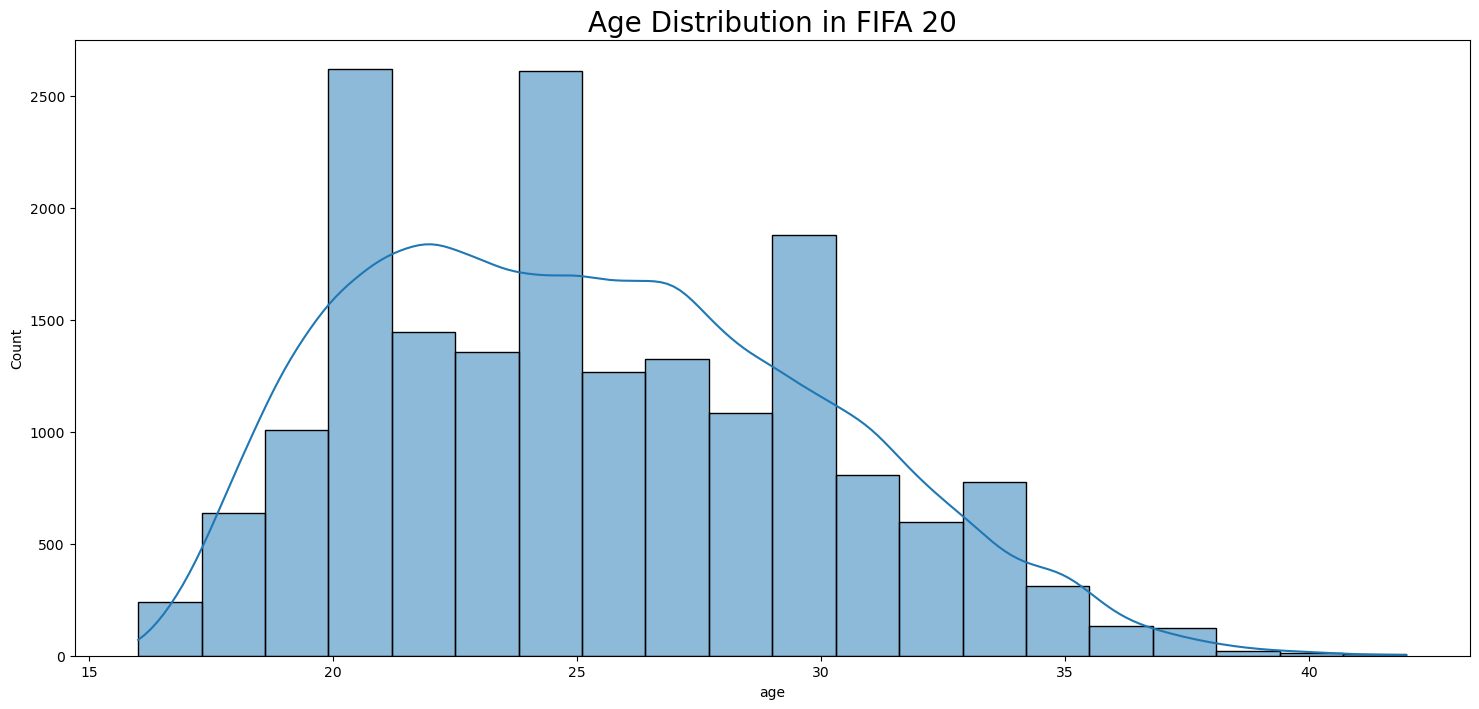

In [93]:
#Getting the age distribution in fifa 20

plt.figure(figsize=(18,8))
plt.title('Age Distribution in FIFA 20', fontsize=20)
sns.histplot(df['age'], kde=True, bins=20)

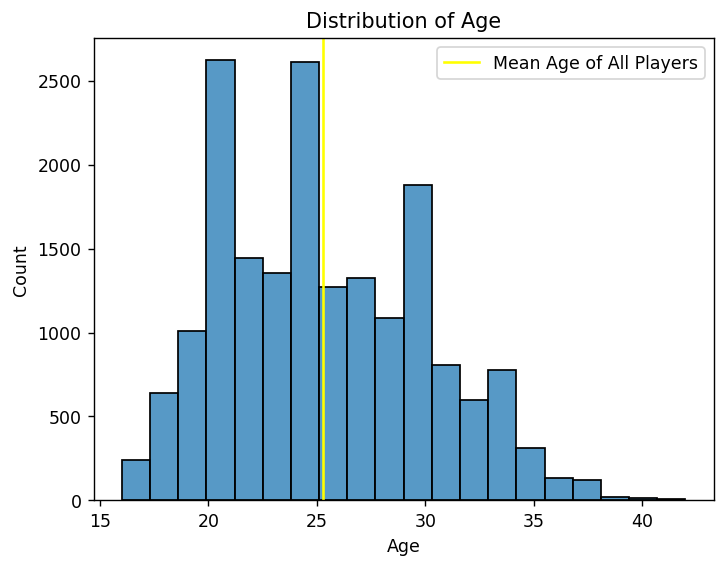

In [94]:
#Getting the distribution of all players

plt.figure(dpi=125)
sns.histplot(df['age'],kde=False,bins=20)
plt.axvline(x=np.mean(df['age']),c='yellow',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

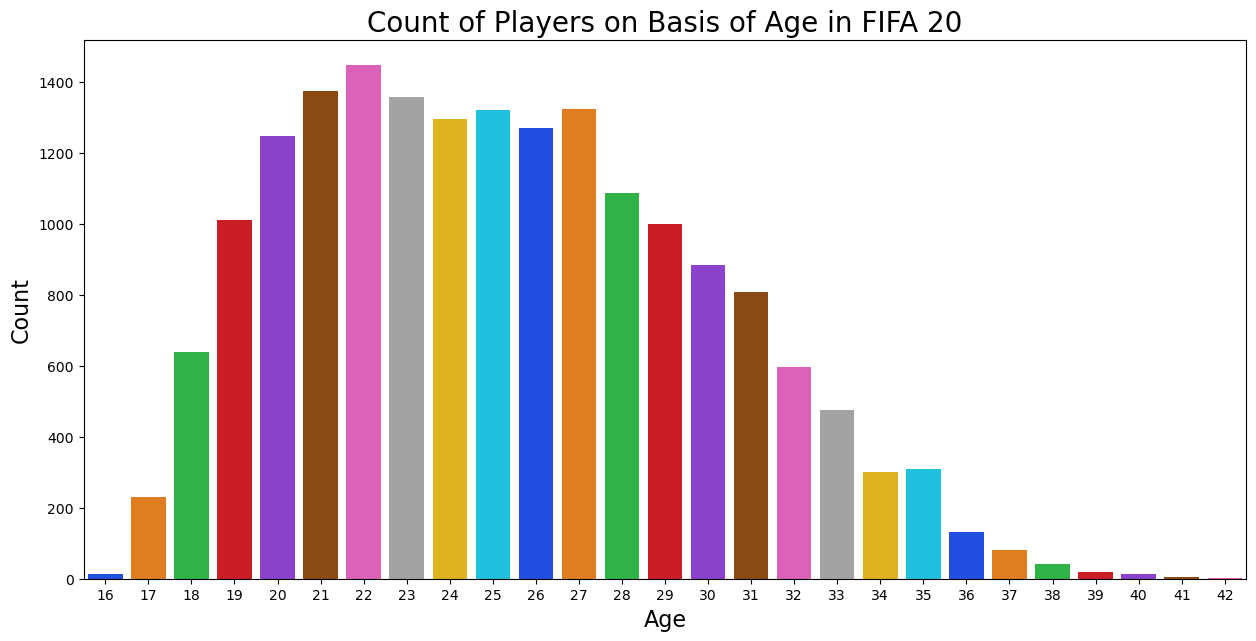

In [95]:
#Getting count of players basig

plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=df, palette='bright')
ax.set_title(label='Count of Players on Basis of Age in FIFA 20', fontsize=20)

ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [96]:
import plotly.graph_objects as go
import plotly.io as pio

# Assuming you have already sorted nationality_stats_sorted dataframe

# Recreate the figure with the sorted data
fig = go.Figure(data=go.Scatter(
    x=nationality_stats_sorted['nationality'],
    y=nationality_stats_sorted['mean'],
    mode='markers',
    marker=dict(
        size=np.sqrt(nationality_stats_sorted['count']) * 10,  # Adjust marker size based on 'count'
        color=nationality_stats_sorted['mean'],  # Color scale based on the average rating
        colorscale='Plasma', 
        showscale=True
    ),
    text=nationality_stats_sorted['nationality']  # Hover text shows the nationality names
))

fig.update_layout(
    title='Average Overall Rating by Nationality',
    xaxis_title='Nationality',
    yaxis_title='Average Overall Rating',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(size=12, color='#000000'),
    xaxis_tickangle=-45,
    xaxis=dict(
        tickmode='array',
        tickvals=[]  # Hides the x-axis labels for clarity
    ),
    yaxis=dict(
        tickvals=list(range(0, 161, 20)),  # Set tick values from 20 to 160 in increments of 20
        range=[0, 160]  # Set the range of the y-axis
    )
)

fig.show()

# Save the plot as HTML. The plot will automatically open in the browser if auto_open is True.
pio.write_html(fig, file="nationality_stats_chart_sorted.html", auto_open=True)


In [97]:

def create_interactive_radar_chart(df, player_names):
    categories = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

    fig = go.Figure()

    for player_name in player_names:
        player = df[df['short_name'] == player_name].iloc[0]
        values = [player[category] for category in categories]
        values += values[:1]  # Complete the loop

        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories + [categories[0]],  # Complete the loop
            fill='toself',
            name=player_name
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )),
        showlegend=True,
        title={
            'text': "Player Performance Comparison",
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font=dict(size=20, color='navy', family="Arial, bold"),
    )

    fig.show()
    
    # Save the plot as HTML. The plot will automatically open in the browser if auto_open is True.
    pio.write_html(fig, file="player_performance_comparison.html", auto_open=True)

# Example usage with a list of 10 big football players
players_to_compare = ['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'K. De Bruyne', 'V. van Dijk', 'S. Mané', 'M. Salah', 'R. Lewandowski', 'S. Agüero', 'L. Suárez']
create_interactive_radar_chart(df, players_to_compare)


In [107]:
# Assuming 'df' is your DataFrame and it's already loaded
# Let's take a sample of 30 players for the plot
sample_df = df.sample(n=30, random_state=1)  # Ensure reproducibility with random_state

# Plotting using Plotly Express
fig = px.scatter(
    sample_df, 
    x='age', 
    y='pace', 
    trendline='ols',  # Ordinary Least Squares regression line
    hover_data=['short_name'],  # Display player names when hovering over points
    title='Age vs Pace with Player Names'
)

# Customize axis labels
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Pace')

# Save the plot as HTML
pio.write_html(fig, file="age_vs_pace_plot.html", auto_open=True)
fig.show()


In [99]:
fig = go.Figure()
data = df.sort_values(by='nationality')

fig.add_trace(go.Box(
    x = data['nationality'],
    y = data['overall'],
    name = "Suspected Outliers",
    boxpoints = "suspectedoutliers",
    marker = dict(
        size = 12,
        color = 'rgb(180, 222, 43)',
        outliercolor = 'rgba(31, 158, 137, 0.6)',
        line = dict(
            outliercolor = 'rgba(31, 158, 137, 0.6)',
            outlierwidth = 2
        )),
    line_color = 'rgba(72, 40, 120)',
    text = data['short_name']
))

fig.update_layout(title='A Box Plot (with suspected outliers) - Nationality vs Overall Rating',
                  xaxis_title='Nationality',
                  yaxis_title='Overall Rating',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'),
                  xaxis_rangeslider_visible=True)
fig.show()

pio.write_html(fig, file="box_plot_chart.html", auto_open=True)